# Explorando [dataset](https://www.inf.ufpr.br/vri/databases/tbFcZE-RodoSol-ALPR.zip) fornecido 

560,383 679,382 680,423 561,422


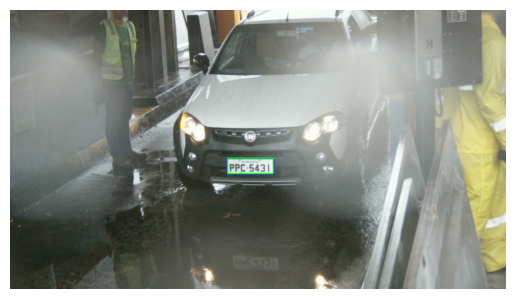

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
name = 'img_000002'
img = cv2.imread(f'data_cars/images/cars-br/{name}.jpg')
altura,largura,_ = img.shape
# print(f"Image size: {size}")
with open (f'data_cars/images/cars-br/{name}.txt', 'r') as f:
    box = [line.replace('corners: ','') for line in f if 'corners' in line]
    box = box[0].replace('\n','')
    print(box)
    a, b, c, d = [[int(p) for p in point.split(',')] for point in box.split(' ')]

car = (255, 0, 0)  # Blue color in BGR
plate = (0, 255, 0)  # Blue color in BGR
thickness = 2

cv2.rectangle(img, a, c, car, thickness)
cv2.rectangle(img, b, d, plate, thickness)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Migrando Dataset modelo yolo

In [24]:
import os 
import shutil

def get_files(*paths):
    for path in paths:
        if os.path.exists(path):
            for root, dirs, files in os.walk(path):
                for file in files:
                    yield os.path.join(root, file.replace('.txt','.jpg'))
archives = set(get_files(   'data_cars/images/motorcycles-me',
                            'data_cars/images/motorcycles-br',
                            'data_cars/images/cars-me',
                            'data_cars/images/cars-br' ))
print(f"Total files: {len(archives)}")
def create_label(file, path):
    for line in file:
        if 'corners' in line:
            box = line.replace('corners: ','').replace('\n','')
            a, b, c, d = [[int(p) for p in point.split(',')] for point in box.split(' ')]
            x_center = ((a[0] + c[0]) / 2) / largura
            y_center = ((a[1] + c[1]) / 2) / altura
            width = (c[0] - a[0]) / largura
            height = (c[1] - a[1]) / altura
            with open(os.path.join(path, archive.split('/')[-1].replace('.jpg','.txt')), 'w') as f:
                f.write(f"0 {x_center} {y_center} {width} {height}\n")

for archive in archives:
    shutil.copy(archive, 'dataset/images/test/')
    with open(archive.replace('.jpg','.txt'), 'r') as file:
        create_label(file,'dataset/labels/test')

Total files: 20000


# Criando Dataset OCR

In [ ]:
import os 
import cv2

def get_files(*paths):
    for path in paths:
        if os.path.exists(path):
            for root, dirs, files in os.walk(path):
                for file in files:
                    yield os.path.join(root, file.replace('.txt','.jpg'))
archives = set(get_files(   'data_cars/images/motorcycles-me',
                            'data_cars/images/motorcycles-br',
                            'data_cars/images/cars-me',
                            'data_cars/images/cars-br' ))
print(f"Total files: {len(archives)}")
def create_label(file, path):
    for line in file:
        if 'corners' in line:
            box = line.replace('corners: ','').replace('\n','')
            a, b, c, d = [[int(p) for p in point.split(',')] for point in box.split(' ')]
            x_center = ((a[0] + c[0]) / 2) / largura
            y_center = ((a[1] + c[1]) / 2) / altura
            width = (c[0] - a[0]) / largura
            height = (c[1] - a[1]) / altura
            with open(os.path.join(path, archive.split('/')[-1].replace('.jpg','.txt')), 'w') as f:
                f.write(f"0 {x_center} {y_center} {width} {height}\n")

for archive in archives:
    shutil.copy(archive, 'dataset/images/test/')
    with open(archive.replace('.jpg','.txt'), 'r') as file:
        create_label(file,'dataset/labels/test')